In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import TimeSeriesSplit
import yfinance as yf
import time
from pandas.tseries.offsets import DateOffset

from google.colab import drive

In [ ]:
drive.mount('/content/drive')
base_path = '/content/drive/MyDrive/Applied Project/data/'

Mounted at /content/drive


# Loading Data

In [ ]:
final_df = pd.read_csv(base_path+"final_df.csv", parse_dates=['created'])

In [ ]:
# for text such as thesis or body_all_comments，fill out empty string
text_cols = ['thesis', 'situation','body_all_comments', 'body_all_updates','situation_updates',
             'buyside_consensus_response']
for col in text_cols:
    final_df[col] = final_df[col].fillna("")

final_df

,idea_id,created,symbol_idea,price_target,direction,timeframe,situation,thesis_word_count,user_id,fs_perm_sec_id,...,word_count_all_comments,number_updates,body_all_updates,word_count_all_updates,situation_updates,user_rating,number_likes,number_follows,number_buyside_consensus_response,buyside_consensus_response
0,7755ad8eb64e35204f1d938c91650f9c3673bdf9160eac...,2008-03-13 14:33:08,OSM:US,25.00,1,1_year_to_2_years,deep_value,145,fa329596650105d05a03567b9db2fbd92ad2da28925be7...,HMXWP8-S-US,...,178.0,0.0,,0.0,,0.0,0.0,0.0,0.0,
1,e7cb18e446ba6a1bb63a37d6e925a20dab30a43d852770...,2008-03-14 18:48:30,LAMR:US,75.00,1,1_year_to_2_years,value,111,bb207f4a379a3f9055530f83e1aa8954025717fe07890a...,NL5J6M-S-US,...,0.0,0.0,,0.0,,0.0,0.0,0.0,0.0,
2,2b481a35098bf7d484d272fefb18ff07f35ff6640c6d96...,2008-03-15 19:18:09,PAY:US,30.00,1,6_months_to_1_year,event_/_special_situations,305,14ccf47813387e652910a082fa023f6163cd78c02b70e6...,KHV4N2-S-US,...,98.0,0.0,,0.0,,0.0,0.0,0.0,0.0,
3,f22b3ddc6e29865452b61ef1a7f2d30403acedb4623a0d...,2008-03-16 03:31:15,MVC:US,20.00,1,1_year_to_2_years,value,133,5418a12be7f1b7c259604aabb1c9de7dee5185c633cb9d...,XC0LQC-S-US,...,0.0,0.0,,0.0,,0.0,1328.0,18201.0,4.0,5 (very good) 5 (very good) 5 (very good) 5 (v...
4,670530e208e8e71f047113d4607a177d5a5ac8d5bb627d...,2008-03-18 12:29:51,VSTNQ:US,8.50,1,6_months_to_1_year,deep_value,192,54d640813cb2a363db6d4e8b5e6b0c9d2df4335580752f...,X317Z7-S-US,...,0.0,0.0,,0.0,,0.0,0.0,0.0,0.0,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15026,24eab802733eff5bde8e2cff57c871c301b5a80a701996...,2022-11-23 04:22:38,OTLY:US,0.78,-1,1_year_to_2_years,value,1698,f290ee359156066361960bf278d9d6235732c913a9f365...,VMJMPH-S-US,...,121.0,0.0,,0.0,,10.0,5427.0,187706.0,334.0,ROIC ROIC ROIC ROIC ROIC ROIC ROIC ROIC ROIC R...
15027,be21cd055ed53b300bc70f583e5f78c2add49ae2c03582...,2022-11-23 09:24:00,IDFCFIRSTB,100.00,-1,1_year_to_2_years,growth,2644,bf739f81623d8de6ca5b8aba01de137ac948cf77c0ef5f...,NaN,...,0.0,2.0,No update No update,0.0,growth growth,0.0,0.0,7.0,0.0,
15028,6ef431b8bcd69514d383ebcc0b11b30aa9102c46c15d57...,2022-11-23 18:37:22,PEGA:US,18.00,-1,6_months_to_1_year,other,1698,acb3ad3c61bff68f972956adb61662c941ffa74b29013b...,NT38T5-S-US,...,272.0,0.0,,0.0,,8.0,0.0,2541.0,133.0,Bearish Bearish Bearish Bearish Bearish Bearis...
15029,b0e67ab5af1dfa9ef45cfc673afbc5ec4daac8ade688cb...,2022-11-24 03:25:35,JET2:LN,24.00,1,2_years_to_5_years,value,1933,f73f0cdc6149d0b57ff79fd1b5dd1b2320c6d006364c78...,MCTT64-S-GB,...,109.0,1.0,"<p lang=""en-GB"">Jet2 released a strong set of ...",72.0,value,8.0,0.0,39.0,1.0,Bullish


In [ ]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15031 entries, 0 to 15030
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   idea_id                            15031 non-null  object        
 1   created                            15031 non-null  datetime64[ns]
 2   symbol_idea                        15031 non-null  object        
 3   price_target                       15031 non-null  float64       
 4   direction                          15031 non-null  int64         
 5   timeframe                          15031 non-null  object        
 6   situation                          15031 non-null  object        
 7   thesis_word_count                  15031 non-null  int64         
 8   user_id                            15031 non-null  object        
 9   fs_perm_sec_id                     14737 non-null  object        
 10  thesis                            

1. **idea_id**: Unique identifier for each investment idea.
2. **created**: Timestamp when the idea was created.
3. **symbol_idea**: Security code analyzed in the idea, formatted according to standard public market conventions (e.g., OSM:US).
4. **price_target**: Predicted target price provided by the author.
5. **direction**: Author's stance on the investment, indicated by 1 for long and -1 for short.
6. **timeframe**: Duration of the author's prediction, expressed as a string, with the shortest being 'less_than_3_months' and the longest being '10_years_to_12_years'.
7. **situation**: Current condition or valuation category of the security as assessed by the author, such as 'growth_at_reasonable_price' or 'deep_value'.
8. **thesis_word_count**: Word count of the thesis.
9. **user_id**: Identifier of the user who created the investment idea.
10. **fs_perm_sec_id**: Internal identifier used by professional financial data platforms for the security analyzed.
11. **thesis**: Detailed content of the investment thesis.
12. **symbol_ISIN**: ISIN code of the security analyzed.
13. **Views**: Number of views the idea received within 30 days of publication.
14. **number_comments**: Number of comments the idea received within 30 days of publication.
15. **body_all_comments**: Complete text of all comments.
16. **word_count_all_comments**: Total word count of all comments.
17. **number_updates**: Number of updates made to the idea within 30 days after publication.
18. **body_all_updates**: Complete text of all updates; commonly includes the phrase 'No comment' if there were no updates.
19. **word_count_all_updates**: Total word count of all updates.
20. **situation_updates**: Situation assessments provided in each update; follows the same categorization as 'situation' mentioned above.
21. **user_rating**: Rating of the user who published the idea, based on website metrics.
22. **number_likes**: Number of likes the idea received within 30 days after publication.
23. **number_follows**: Number of times the user was followed within 30 days after the idea's publication.
24. **number_buyside_consensus_response**: Count of buyside consensus responses.
25. **buyside_consensus_response**: Concatenation of multiple buyside consensus responses provided by each user, such as repeated mentions of 'ROIC' or 'bullish'.


In [ ]:
timeframe_to_drop = ['5_years_to_7_years', '10_years_to_12_years', '7_years_to_10_years','2_years_and_beyond']
final_df = final_df[~final_df['timeframe'].isin(timeframe_to_drop)].reset_index(drop=True)
## loss 56 rows

# Calculate Strategy Returns

## Fetch Securities Prices

In [ ]:
final_df[['symbol', 'symbol_region']] = final_df['symbol_idea'].str.split(':', expand=True)

In [ ]:
exchange_suffix_map = {
    'US': '',
    'CN': '.TO',   #Canada
    'LN': '.L',    #UK London
    'HK': '.HK',   #Hong Kong
    'IN': '.NS',   #India
    'AU': '.AX',   #Austrilia
    'JP': '.T',    #Japan
    'GR': '.DE',   #Germany
    'FP': '.PA'    #France
}

In [ ]:
def generate_yahoo_symbol(row, mapping):
    sym = row['symbol']
    region = row['symbol_region']
    suffix = mapping.get(region, None)

    if suffix is None:
        return None

    # if region belongs to CN，transfer / to -
    if region == 'CN':
        sym = sym.replace('/', '-')

    return f"{sym}{suffix}"

final_df['yahoo_symbol'] = final_df.apply(generate_yahoo_symbol, axis=1, mapping=exchange_suffix_map)

In [ ]:
final_df = final_df.dropna(subset=['yahoo_symbol']).reset_index(drop=True)
final_df['yahoo_symbol']

,yahoo_symbol
0,OSM
1,LAMR
2,PAY
3,MVC
4,VSTNQ
...,...
12621,OKTA
12622,OTLY
12623,PEGA
12624,JET2.L


In [ ]:
all_unique_tickers = final_df['yahoo_symbol'].unique().tolist()
print(len(all_unique_tickers))

5613


In [ ]:
min_date = final_df['created'].min()
max_date = final_df['created'].max()

# Add a buffer of 1~2 years to cover the longest timeframe for future price retrieval
end_date_for_download = max_date + pd.DateOffset(years=2)

print("Earliest post date:", min_date)
print("Latest post date:", max_date)
print("Data download end date:", end_date_for_download)

最早发帖日期: 2008-03-13 14:33:08
最晚发帖日期: 2022-11-29 20:46:18
下载数据截至日期: 2024-11-29 20:46:18


In [ ]:
# ## Don't run these codes again

# batch_size = 100
# num_batches = (len(all_unique_tickers) + batch_size - 1) // batch_size

# # Initialize an empty DataFrame to combine results from each batch
# all_data_combined = pd.DataFrame()

# # Loop through batches to download data
# for i in range(num_batches):
#     start_idx = i * batch_size
#     end_idx = min((i + 1) * batch_size, len(all_unique_tickers))
#     tickers_batch = all_unique_tickers[start_idx:end_idx]

#     print(f"Downloading batch {i+1}/{num_batches}: Tickers {start_idx} to {end_idx - 1}")

#     try:
#         batch_data = yf.download(
#             tickers=tickers_batch,
#             start=min_date,
#             end=end_date_for_download,
#             auto_adjust=True,
#             threads=True,
#             progress=True
#         )['Close']  # Retain only closing prices

#         # Combine with the main DataFrame
#         all_data_combined = pd.concat([all_data_combined, batch_data], axis=1)

#     except Exception as e:
#         print(f"Error in batch {i+1}: {e}")

#     # Optional: Add delay to avoid hitting rate limits
#     time.sleep(30)

In [ ]:
# ## Don't run these codes again
# data_combined = all_data_combined.dropna(axis=1, how='all')
# data_combined.to_csv('/content/drive/MyDrive/Applied Project/data/securities_prices.csv', index=True)

In [ ]:
securities_prices = pd.read_csv(base_path+'securities_prices.csv', index_col=0, parse_dates=True)
securities_prices

,1662.T,7988.T,AOBI,BBD-B.TO,BEBE,BH,BK,BR,BRN,CF,...,BILL,COA.L,HEAD.L,HLI,JET2.L,NRP,SAP.TO,VET,WAF.DE,XPOF
Date,,,,,,,,,,,,,,,,,,,,,
2008-03-13,425.517700,768.798889,8076.152344,129.025253,23.457121,92.419449,30.641706,13.046619,8.368498,16.987843,...,NaN,49.795025,362.402313,NaN,25.958454,72.711899,9.774105,NaN,NaN,NaN
2008-03-14,417.334534,748.206177,7835.671387,123.687866,22.861265,88.166313,29.028276,12.658747,8.522578,16.399965,...,NaN,49.795025,355.130707,NaN,25.708849,71.332558,9.756074,NaN,NaN,NaN
2008-03-17,399.215057,734.477478,7474.949707,120.206963,21.888016,88.051369,26.881529,12.045202,7.906256,15.516731,...,NaN,49.383446,340.118500,NaN,26.208054,67.933418,9.518029,NaN,NaN,NaN
2008-03-18,385.771484,736.193604,7935.871582,128.561142,23.099606,91.269951,30.277163,12.376658,8.705549,16.922838,...,NaN,49.383446,354.661621,NaN,24.211250,69.017204,9.380978,NaN,NaN,NaN
2008-03-19,378.757446,753.354309,7585.170410,124.151985,22.682503,90.465309,29.190275,12.306136,8.445539,15.027770,...,NaN,49.383446,351.846710,NaN,21.216040,68.475311,9.377370,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-25,1074.027222,3636.435791,0.000500,106.410004,1.200000,206.979996,80.775040,231.451584,1.700000,86.853600,...,93.760002,95.599998,133.000000,189.291321,1592.955811,105.358643,25.966154,10.47,47.200001,15.70
2024-11-26,1055.408203,3639.408447,0.000500,96.489998,1.320000,206.860001,80.824760,234.637115,1.730000,87.598999,...,92.849998,95.699997,131.500000,188.844131,1606.955322,106.928230,25.443872,10.11,47.560001,15.39
2024-11-27,1039.728882,3554.194824,0.000500,93.019997,1.240000,215.000000,81.292183,234.001999,1.770000,88.115814,...,89.769997,95.400002,130.500000,186.250549,1612.955200,107.418732,25.887320,10.20,46.880001,15.21


## Calculate Returns

In [ ]:
timeframe_range_map = {
    'less_than_3_months': (0, 3),
    '3_months_to_6_months': (3, 6),
    '6_months_to_1_year': (6, 12),
    '1_year_to_2_years': (12, 24),
    '2_years_to_5_years': (24, 60),
}

In [ ]:
# Define the function to calculate annualized return
def compute_annualized_return(row):
    tkr = row['yahoo_symbol']
    created_date = row['created']
    timeframe = row['timeframe']
    direction = row['direction']

    # Mapping timeframe to time intervals
    if timeframe not in timeframe_range_map:
        return np.nan

    start_offset, end_offset = timeframe_range_map[timeframe]
    holding_years = (end_offset - start_offset) / 12.0
    if holding_years <= 0:
        return np.nan

    # Calculating date intervals
    start_date = created_date + DateOffset(months=start_offset)
    end_date = created_date + DateOffset(months=end_offset)

    # Fetching closing price data for the specified ticker
    if tkr not in securities_prices.columns:
        return np.nan

    price_series = securities_prices[tkr]

    # Getting the nearest available trading price after the idea's creation date (price_0)
    try:
        price_0 = price_series[price_series.index >= created_date].iloc[0]
    except IndexError:
        return np.nan

    # Getting all closing prices within the specified timeframe
    mask = (price_series.index >= start_date) & (price_series.index <= end_date)
    price_in_range = price_series[mask]
    if price_in_range.empty:
        return np.nan

    avg_price = price_in_range.mean()
    total_return = (avg_price - price_0) / price_0
    adjusted_return = direction * total_return

    # Calculating annualized return
    ann_return = (1 + adjusted_return) ** (1 / holding_years) - 1
    return ann_return

In [ ]:
# Apply function to final_df
final_df['annualized_return'] = final_df.apply(compute_annualized_return, axis=1)

<ipython-input-17-0c39652bd8ae>:44: RuntimeWarning: invalid value encountered in scalar power
  ann_return = (1 + adjusted_return) ** (1 / holding_years) - 1


In [ ]:
final_df[['idea_id', 'yahoo_symbol', 'created', 'timeframe', 'direction', 'annualized_return']]

,idea_id,yahoo_symbol,created,timeframe,direction,annualized_return
0,7755ad8eb64e35204f1d938c91650f9c3673bdf9160eac...,OSM,2008-03-13 14:33:08,1_year_to_2_years,1,NaN
1,e7cb18e446ba6a1bb63a37d6e925a20dab30a43d852770...,LAMR,2008-03-14 18:48:30,1_year_to_2_years,1,-0.307328
2,2b481a35098bf7d484d272fefb18ff07f35ff6640c6d96...,PAY,2008-03-15 19:18:09,6_months_to_1_year,1,NaN
3,f22b3ddc6e29865452b61ef1a7f2d30403acedb4623a0d...,MVC,2008-03-16 03:31:15,1_year_to_2_years,1,NaN
4,670530e208e8e71f047113d4607a177d5a5ac8d5bb627d...,VSTNQ,2008-03-18 12:29:51,6_months_to_1_year,1,NaN
...,...,...,...,...,...,...
12621,e4f3ffc15fe9d9641b8aa92f3683703ff1672cbe37bb60...,OKTA,2022-11-23 04:17:50,1_year_to_2_years,-1,NaN
12622,24eab802733eff5bde8e2cff57c871c301b5a80a701996...,OTLY,2022-11-23 04:22:38,1_year_to_2_years,-1,NaN
12623,6ef431b8bcd69514d383ebcc0b11b30aa9102c46c15d57...,PEGA,2022-11-23 18:37:22,6_months_to_1_year,-1,NaN
12624,b0e67ab5af1dfa9ef45cfc673afbc5ec4daac8ade688cb...,JET2.L,2022-11-24 03:25:35,2_years_to_5_years,1,0.165950


In [ ]:
success_count = final_df['annualized_return'].notna().sum()
total_count = len(final_df)
print(f"Successfully calculated counts:{success_count} / {total_count}")

成功计算收益率的数量：6915 / 12626


If missing data is "Missing Completely at Random" (MCAR), such as cases where some securities have no available price data due to reasons like low trading activity, delisting, or being listed on less mainstream markets, then these missing values do not systematically bias towards any particular type of investment idea.

Consequently, these missing values will not introduce estimation bias. We can confidently proceed with the remaining data, as the regression results remain valid and interpretable.


In [ ]:
final_df['annualized_return'].describe()

,annualized_return
count,6915.000000
mean,0.460872
std,15.491847
min,-9.673096
25%,-0.165531
50%,0.100855
75%,0.383728
max,1275.779198


## Add Benchmark Returns

In [ ]:
benchmark_data = yf.download("^GSPC", start=min_date, end=end_date_for_download,auto_adjust=True,)['Close']

[*********************100%***********************]  1 of 1 completed


In [ ]:
benchmark_data = benchmark_data['^GSPC']

In [ ]:
def compute_benchmark_return(row):
    created_date = row['created']
    timeframe = row['timeframe']

    # ensure timeframe is valid
    if timeframe not in timeframe_range_map or pd.isna(created_date):
        return np.nan

    start_offset, end_offset = timeframe_range_map[timeframe]
    holding_years = (end_offset - start_offset) / 12.0
    if holding_years <= 0:
        return np.nan

    start_date = created_date + DateOffset(months=start_offset)
    end_date = created_date + DateOffset(months=end_offset)

    # fetch the closing price of benchmark through corresponding timeframe
    try:
        price_0 = benchmark_data[benchmark_data.index >= created_date].dropna().iloc[0]
    except IndexError:
        return np.nan

    price_range = benchmark_data[(benchmark_data.index >= start_date) & (benchmark_data.index <= end_date)]
    if price_range.empty:
        return np.nan

    avg_price = price_range.mean()

    if price_0 <= 0 or avg_price <= 0:
        return np.nan

    total_return = (avg_price - price_0) / price_0
    ann_return = (1 + total_return) ** (1 / holding_years) - 1

    return ann_return

In [ ]:
final_df['benchmark_return'] = final_df.apply(compute_benchmark_return, axis=1)
final_df

,idea_id,created,symbol_idea,price_target,direction,timeframe,situation,thesis_word_count,user_id,fs_perm_sec_id,...,user_rating,number_likes,number_follows,number_buyside_consensus_response,buyside_consensus_response,symbol,symbol_region,yahoo_symbol,annualized_return,benchmark_return
0,7755ad8eb64e35204f1d938c91650f9c3673bdf9160eac...,2008-03-13 14:33:08,OSM:US,25.00,1,1_year_to_2_years,deep_value,145,fa329596650105d05a03567b9db2fbd92ad2da28925be7...,HMXWP8-S-US,...,0.0,0.0,0.0,0.0,,OSM,US,OSM,NaN,-0.218808
1,e7cb18e446ba6a1bb63a37d6e925a20dab30a43d852770...,2008-03-14 18:48:30,LAMR:US,75.00,1,1_year_to_2_years,value,111,bb207f4a379a3f9055530f83e1aa8954025717fe07890a...,NL5J6M-S-US,...,0.0,0.0,0.0,0.0,,LAMR,US,LAMR,-0.307328,-0.211746
2,2b481a35098bf7d484d272fefb18ff07f35ff6640c6d96...,2008-03-15 19:18:09,PAY:US,30.00,1,6_months_to_1_year,event_/_special_situations,305,14ccf47813387e652910a082fa023f6163cd78c02b70e6...,KHV4N2-S-US,...,0.0,0.0,0.0,0.0,,PAY,US,PAY,NaN,-0.506658
3,f22b3ddc6e29865452b61ef1a7f2d30403acedb4623a0d...,2008-03-16 03:31:15,MVC:US,20.00,1,1_year_to_2_years,value,133,5418a12be7f1b7c259604aabb1c9de7dee5185c633cb9d...,XC0LQC-S-US,...,0.0,1328.0,18201.0,4.0,5 (very good) 5 (very good) 5 (very good) 5 (v...,MVC,US,MVC,NaN,-0.210037
4,670530e208e8e71f047113d4607a177d5a5ac8d5bb627d...,2008-03-18 12:29:51,VSTNQ:US,8.50,1,6_months_to_1_year,deep_value,192,54d640813cb2a363db6d4e8b5e6b0c9d2df4335580752f...,X317Z7-S-US,...,0.0,0.0,0.0,0.0,,VSTNQ,US,VSTNQ,NaN,-0.533764
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12621,e4f3ffc15fe9d9641b8aa92f3683703ff1672cbe37bb60...,2022-11-23 04:17:50,OKTA:US,9.00,-1,1_year_to_2_years,value,1139,f290ee359156066361960bf278d9d6235732c913a9f365...,K4FYCZ-S-US,...,4.0,5427.0,187706.0,334.0,ROIC ROIC ROIC ROIC ROIC ROIC ROIC ROIC ROIC R...,OKTA,US,OKTA,NaN,0.314955
12622,24eab802733eff5bde8e2cff57c871c301b5a80a701996...,2022-11-23 04:22:38,OTLY:US,0.78,-1,1_year_to_2_years,value,1698,f290ee359156066361960bf278d9d6235732c913a9f365...,VMJMPH-S-US,...,10.0,5427.0,187706.0,334.0,ROIC ROIC ROIC ROIC ROIC ROIC ROIC ROIC ROIC R...,OTLY,US,OTLY,NaN,0.314955
12623,6ef431b8bcd69514d383ebcc0b11b30aa9102c46c15d57...,2022-11-23 18:37:22,PEGA:US,18.00,-1,6_months_to_1_year,other,1698,acb3ad3c61bff68f972956adb61662c941ffa74b29013b...,NT38T5-S-US,...,8.0,0.0,2541.0,133.0,Bearish Bearish Bearish Bearish Bearish Bearis...,PEGA,US,PEGA,NaN,0.189986
12624,b0e67ab5af1dfa9ef45cfc673afbc5ec4daac8ade688cb...,2022-11-24 03:25:35,JET2:LN,24.00,1,2_years_to_5_years,value,1933,f73f0cdc6149d0b57ff79fd1b5dd1b2320c6d006364c78...,MCTT64-S-GB,...,8.0,0.0,39.0,1.0,Bullish,JET2,LN,JET2.L,0.165950,0.142869


# Sentiment Analysis

## For 'situation' columns with limited vocabulary

The sentiment scores for columns such as **`situation`** and **`situation_updates`** are derived using a predefined mapping scheme, since these columns consist of categorical tags within a limited set of descriptive labels (e.g., "growth," "deep_value," "contrarian," etc.). Each descriptive label is assigned a sentiment score based on its perceived investment stance (positive, neutral, or negative). To quantify sentiment numerically, tags from **`situation_updates`** are separated and mapped individually to their respective scores, and the average of these scores is computed as the overall sentiment measure. This structured scoring approach ensures consistency and interpretability in sentiment analysis for the given categorical fields.

In [ ]:
final_df = final_df.dropna(subset=['annualized_return']).reset_index(drop=True)

In [ ]:
df = final_df[['idea_id','situation_updates','situation']].copy()

# define score mapping
situation_score_map = {
    "growth": 2,
    "growth_at_reasonable_price": 1.5,
    "value": 1,
    "event_/_special_situations": 0.5,
    "relative_value": 0.5,
    "contrarian": 0,
    "deep_value": -0.5,
    "pro_forma": -1,
    "other": 0,
}

# seperate tags string
df['update_tags'] = df['situation_updates'].fillna("").apply(lambda x: x.lower().split())

# scoring function
def compute_avg_score(tags):
    scores = [situation_score_map.get(tag, 0) for tag in tags]
    return sum(scores) / len(scores) if scores else 0

In [ ]:
df['situation_updates_score'] = df['update_tags'].apply(compute_avg_score)

In [ ]:
df['situation_score'] = df['situation'].str.lower().map(situation_score_map).fillna(0)

In [ ]:
df.drop(['update_tags'], axis=1, inplace=True)
df

,idea_id,situation_updates,situation,situation_updates_score,situation_score
0,e7cb18e446ba6a1bb63a37d6e925a20dab30a43d852770...,,value,0.0,1.0
1,9599e8e8f7be32c51c4b55d8fb5a7855fc35352784d81d...,,value,0.0,1.0
2,b093b705b49731a15685a8cc63f7fa844931f48dd0b3a2...,,event_/_special_situations,0.0,0.5
3,b63e1cae353b3bc76656a6710b245b5a52330920a1be0e...,,deep_value,0.0,-0.5
4,d9853e302ba33af7a83228d35eecf8747cad24b3f5336f...,,deep_value,0.0,-0.5
...,...,...,...,...,...
6910,e1e355b90a65f549d02e9cb1a96b2d99dfea9d22fe35a3...,,deep_value,0.0,-0.5
6911,42f6f1462e7bd72603362703c881d7da7de25573a42915...,value,value,1.0,1.0
6912,185fc0e45a26132b6eafe46117e7cfc4f0ac62cbf6f511...,,value,0.0,1.0
6913,b0e67ab5af1dfa9ef45cfc673afbc5ec4daac8ade688cb...,value,value,1.0,1.0


## For thesis and comments

For textual fields such as **`thesis`** and **`comments`**, sentiment analysis scores were derived using OpenAI's GPT model. Specifically, the model was prompted to evaluate two aspects from each investment-related text: (1) **stance_score**, indicating the directional view expressed in the text (positive values indicate a bullish or "long" stance, negative values indicate a bearish or "short" stance, and zero indicates neutrality); and (2) **confidence_score**, representing the degree of confidence conveyed, measured by evaluating the reasoning quality and awareness of potential risks. This method provides nuanced, contextually sensitive numerical sentiment indicators, enabling more accurate quantitative analysis of investor sentiment from unstructured textual data.

In [ ]:
from openai import OpenAI
import json
import time
from tqdm import tqdm

In [ ]:
# ## Do not run these codes again

# client = OpenAI(api_key=my_api_key)

# def build_prompt(text):
#     return f"""
# Analyze the following investment text and return:

# 1. stance_score (float, -1 to 1): Directional view. Positive = long, negative = short, 0 = neutral.
# 2. confidence_score (float, 0 to 1): How confident the tone is, based on reasoning and risk awareness.

# Text:
# {text}

# Output JSON:
# {{"stance_score": ..., "confidence_score": ...}}
# """

# def ask_chatgpt(text):
#     try:
#         response = client.chat.completions.create(
#             model="gpt-3.5-turbo",
#             messages=[{"role": "user", "content": build_prompt(text)}],
#             temperature=0.3
#         )
#         content = response.choices[0].message.content
#         result = json.loads(content)
#         return result.get("stance_score"), result.get("confidence_score")
#     except Exception as e:
#         print("Error:", e)
#         return None, None

In [ ]:
# ## Do not run these codes again

# # Initialize results columns
# df['thesis_stance_score'] = None
# df['thesis_confidence_score'] = None
# df['comments_stance_score'] = None
# df['comments_confidence_score'] = None

In [ ]:
# ## Do not run these codes again

# results = []

# for i in tqdm(range(len(df))):
#     if pd.notna(df.loc[i, 'thesis_stance_score']):
#         continue

#     row = df.loc[i]
#     idea_id = row['idea_id']
#     thesis = row['thesis']
#     comments = row['body_all_comments']

#     thesis_stance, thesis_conf = ask_chatgpt(thesis)

#     if pd.notna(comments) and comments.strip():  # 只分析非空评论
#         comment_stance, comment_conf = ask_chatgpt(comments)
#     else:
#         comment_stance, comment_conf = None, None

#     df.at[i, 'thesis_stance_score'] = thesis_stance
#     df.at[i, 'thesis_confidence_score'] = thesis_conf
#     df.at[i, 'comments_stance_score'] = comment_stance
#     df.at[i, 'comments_confidence_score'] = comment_conf

#     results.append({
#         'idea_id': idea_id,
#         'thesis_stance_score': thesis_stance,
#         'thesis_confidence_score': thesis_conf,
#         'comments_stance_score': comment_stance,
#         'comments_confidence_score': comment_conf
#     })

#     pd.DataFrame(results).to_csv("chatgpt_sentiment_temp.csv", index=False)

#     time.sleep(1.2)

# print("Done!")

In [ ]:
# ## Do not run these codes again

# sentiment_df.to_csv(base_path+'chatgpt_sentiment_temp.csv', index=False)

In [ ]:
sentiment = pd.read_csv(base_path+"chatgpt_sentiment_temp.csv")

In [ ]:
sentiment

,idea_id,thesis_stance_score,thesis_confidence_score,comments_stance_score,comments_confidence_score
0,e7cb18e446ba6a1bb63a37d6e925a20dab30a43d852770...,0.8,0.9,NaN,NaN
1,9599e8e8f7be32c51c4b55d8fb5a7855fc35352784d81d...,0.5,0.8,NaN,NaN
2,b093b705b49731a15685a8cc63f7fa844931f48dd0b3a2...,0.8,0.9,NaN,NaN
3,b63e1cae353b3bc76656a6710b245b5a52330920a1be0e...,0.8,0.9,NaN,NaN
4,d9853e302ba33af7a83228d35eecf8747cad24b3f5336f...,0.8,0.9,NaN,NaN
...,...,...,...,...,...
6910,e1e355b90a65f549d02e9cb1a96b2d99dfea9d22fe35a3...,0.8,0.9,0.2,0.6
6911,42f6f1462e7bd72603362703c881d7da7de25573a42915...,0.8,0.9,0.2,0.6
6912,185fc0e45a26132b6eafe46117e7cfc4f0ac62cbf6f511...,0.5,0.8,0.5,0.7
6913,b0e67ab5af1dfa9ef45cfc673afbc5ec4daac8ade688cb...,0.8,0.9,0.2,0.6


In [ ]:
# merge all sentiment scores to final_df

df_scores = df[['idea_id', 'situation_updates_score', 'situation_score']]
final_df = pd.merge(final_df, df_scores, on='idea_id', how='left')
final_df = pd.merge(final_df, sentiment, on='idea_id', how='left')

In [ ]:
final_df

,idea_id,created,symbol_idea,price_target,direction,timeframe,situation,thesis_word_count,user_id,fs_perm_sec_id,...,symbol_region,yahoo_symbol,annualized_return,benchmark_return,situation_updates_score,situation_score,thesis_stance_score,thesis_confidence_score,comments_stance_score,comments_confidence_score
0,e7cb18e446ba6a1bb63a37d6e925a20dab30a43d852770...,2008-03-14 18:48:30,LAMR:US,75.0,1,1_year_to_2_years,value,111,bb207f4a379a3f9055530f83e1aa8954025717fe07890a...,NL5J6M-S-US,...,US,LAMR,-0.307328,-0.211746,0.0,1.0,0.8,0.9,NaN,NaN
1,9599e8e8f7be32c51c4b55d8fb5a7855fc35352784d81d...,2008-03-19 20:29:57,HCBP:US,20.0,1,2_years_to_5_years,value,518,3a6393fc79bc243016e7c72eb0c54c0a33928d3a519a97...,VKCHKD-S-US,...,US,HCBP,-0.188651,-0.010127,0.0,1.0,0.5,0.8,NaN,NaN
2,b093b705b49731a15685a8cc63f7fa844931f48dd0b3a2...,2008-03-23 20:13:28,TWI:US,45.0,1,1_year_to_2_years,event_/_special_situations,246,a3581b9d0cd33ecc15b38d0ef948f32c5a449b71048398...,H30B6Z-S-US,...,US,TWI,-0.675041,-0.247383,0.0,0.5,0.8,0.9,NaN,NaN
3,b63e1cae353b3bc76656a6710b245b5a52330920a1be0e...,2008-03-24 14:36:17,FLIC:US,25.5,1,6_months_to_1_year,deep_value,315,f37988c06a456cd7e248f54db2f39306de77e75754fd4e...,W5NBSG-S-US,...,US,FLIC,0.320142,-0.583443,0.0,-0.5,0.8,0.9,NaN,NaN
4,d9853e302ba33af7a83228d35eecf8747cad24b3f5336f...,2008-03-27 19:01:23,DLX:US,27.0,1,1_year_to_2_years,deep_value,194,f69a4f187a6b32c1d01e15d852e470c4c66073dc3811fd...,WZH4ZX-S-US,...,US,DLX,-0.101228,-0.223771,0.0,-0.5,0.8,0.9,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6910,e1e355b90a65f549d02e9cb1a96b2d99dfea9d22fe35a3...,2022-11-22 03:42:54,TW:US,73.0,1,2_years_to_5_years,deep_value,1711,c2d98ebea51efa4ae100afa79a20e67d3a5a392c1dd232...,R62669-S-US,...,US,TW,0.331199,0.142762,0.0,-0.5,0.8,0.9,0.2,0.6
6911,42f6f1462e7bd72603362703c881d7da7de25573a42915...,2022-11-22 20:57:09,COA:LN,82.0,1,1_year_to_2_years,value,1061,e20596b4d00f8c70cc5a58c011ea847385423d488a27f5...,X1XP0S-S-GB,...,LN,COA.L,0.238792,0.314583,1.0,1.0,0.8,0.9,0.2,0.6
6912,185fc0e45a26132b6eafe46117e7cfc4f0ac62cbf6f511...,2022-11-22 22:01:41,WAF:GR,120.0,1,2_years_to_5_years,value,4090,9650d2d5871272e24809fb617ce56bab7dad1f58214151...,NL7V5B-S-DE,...,GR,WAF.DE,-0.141244,0.142762,0.0,1.0,0.5,0.8,0.5,0.7
6913,b0e67ab5af1dfa9ef45cfc673afbc5ec4daac8ade688cb...,2022-11-24 03:25:35,JET2:LN,24.0,1,2_years_to_5_years,value,1933,f73f0cdc6149d0b57ff79fd1b5dd1b2320c6d006364c78...,MCTT64-S-GB,...,LN,JET2.L,0.165950,0.142869,1.0,1.0,0.8,0.9,0.2,0.6


In [ ]:
final_df['thesis_stance_score'].isnull().sum()
final_df = final_df.dropna(subset=['thesis_stance_score']).reset_index(drop=True)

#lose 140 rows

,idea_id,created,symbol_idea,price_target,direction,timeframe,situation,thesis_word_count,user_id,fs_perm_sec_id,...,symbol_region,yahoo_symbol,annualized_return,benchmark_return,situation_updates_score,situation_score,thesis_stance_score,thesis_confidence_score,comments_stance_score,comments_confidence_score
0,e7cb18e446ba6a1bb63a37d6e925a20dab30a43d852770...,2008-03-14 18:48:30,LAMR:US,75.0,1,1_year_to_2_years,value,111,bb207f4a379a3f9055530f83e1aa8954025717fe07890a...,NL5J6M-S-US,...,US,LAMR,-0.307328,-0.211746,0.0,1.0,0.8,0.9,NaN,NaN
1,9599e8e8f7be32c51c4b55d8fb5a7855fc35352784d81d...,2008-03-19 20:29:57,HCBP:US,20.0,1,2_years_to_5_years,value,518,3a6393fc79bc243016e7c72eb0c54c0a33928d3a519a97...,VKCHKD-S-US,...,US,HCBP,-0.188651,-0.010127,0.0,1.0,0.5,0.8,NaN,NaN
2,b093b705b49731a15685a8cc63f7fa844931f48dd0b3a2...,2008-03-23 20:13:28,TWI:US,45.0,1,1_year_to_2_years,event_/_special_situations,246,a3581b9d0cd33ecc15b38d0ef948f32c5a449b71048398...,H30B6Z-S-US,...,US,TWI,-0.675041,-0.247383,0.0,0.5,0.8,0.9,NaN,NaN
3,b63e1cae353b3bc76656a6710b245b5a52330920a1be0e...,2008-03-24 14:36:17,FLIC:US,25.5,1,6_months_to_1_year,deep_value,315,f37988c06a456cd7e248f54db2f39306de77e75754fd4e...,W5NBSG-S-US,...,US,FLIC,0.320142,-0.583443,0.0,-0.5,0.8,0.9,NaN,NaN
4,d9853e302ba33af7a83228d35eecf8747cad24b3f5336f...,2008-03-27 19:01:23,DLX:US,27.0,1,1_year_to_2_years,deep_value,194,f69a4f187a6b32c1d01e15d852e470c4c66073dc3811fd...,WZH4ZX-S-US,...,US,DLX,-0.101228,-0.223771,0.0,-0.5,0.8,0.9,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6770,e1e355b90a65f549d02e9cb1a96b2d99dfea9d22fe35a3...,2022-11-22 03:42:54,TW:US,73.0,1,2_years_to_5_years,deep_value,1711,c2d98ebea51efa4ae100afa79a20e67d3a5a392c1dd232...,R62669-S-US,...,US,TW,0.331199,0.142762,0.0,-0.5,0.8,0.9,0.2,0.6
6771,42f6f1462e7bd72603362703c881d7da7de25573a42915...,2022-11-22 20:57:09,COA:LN,82.0,1,1_year_to_2_years,value,1061,e20596b4d00f8c70cc5a58c011ea847385423d488a27f5...,X1XP0S-S-GB,...,LN,COA.L,0.238792,0.314583,1.0,1.0,0.8,0.9,0.2,0.6
6772,185fc0e45a26132b6eafe46117e7cfc4f0ac62cbf6f511...,2022-11-22 22:01:41,WAF:GR,120.0,1,2_years_to_5_years,value,4090,9650d2d5871272e24809fb617ce56bab7dad1f58214151...,NL7V5B-S-DE,...,GR,WAF.DE,-0.141244,0.142762,0.0,1.0,0.5,0.8,0.5,0.7
6773,b0e67ab5af1dfa9ef45cfc673afbc5ec4daac8ade688cb...,2022-11-24 03:25:35,JET2:LN,24.0,1,2_years_to_5_years,value,1933,f73f0cdc6149d0b57ff79fd1b5dd1b2320c6d006364c78...,MCTT64-S-GB,...,LN,JET2.L,0.165950,0.142869,1.0,1.0,0.8,0.9,0.2,0.6


In [ ]:
# evaluate the accuracy of openai sentiment analysis
correct = (final_df['thesis_stance_score'] * final_df['direction']) > 0
accuracy = correct.mean()
print(f"Accuracy: {accuracy:.2%}")

Accuracy: 96.71%


In [ ]:
final_df['excess_return'] = final_df['annualized_return'] - final_df['benchmark_return']
final_df["excess_return_transformed"] = np.sign(final_df["excess_return"]) * np.log1p(abs(final_df["excess_return"]))

In [ ]:
# ## do not run these codes again
# final_df.to_csv(base_path+'final_df_with_sentiment.csv', index=False)

# ML Model

In [ ]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from datetime import timedelta

In [ ]:
final_df = pd.read_csv(base_path+'final_df_with_sentiment.csv',parse_dates=['created'])

In [ ]:
ds = final_df.sort_values("created").reset_index(drop=True)

In [ ]:
# process thesis_stance_score
consistent_idx = ds[((ds['direction'] == 1) & (ds['thesis_stance_score'] >= 0)) |
                    ((ds['direction'] == -1) & (ds['thesis_stance_score'] <= 0))].index

ds = ds.iloc[consistent_idx]

ds.loc[:, 'thesis_stance_score'] = ds['thesis_stance_score'].abs()

In [ ]:
# split training set and testing set according to time series
split_idx = int(0.8 * len(ds))
df_train = ds.iloc[:split_idx]
df_test = ds.iloc[split_idx:]

Given the noisy and highly contextual nature of excess returns in public equity investments, I experimented with a range of supervised learning models including Ridge, Lasso, Gradient Boosting, and XGBoost. Among these, Random Forest consistently outperformed in both cross-validation and out-of-sample (test set) R², despite its simplicity.

Random Forests are robust to noisy features, resistant to overfitting, and capable of capturing nonlinear relationships without requiring extensive parameter tuning. In contrast, linear models like Ridge and Lasso struggled to extract meaningful signal from the high-dimensional, sentiment-driven feature space, even after standardization. Gradient Boosting and XGBoost, while powerful in theory, did not outperform Random Forest in this case—likely due to the relatively modest dataset size and the limited signal-to-noise ratio inherent in idea-level alpha prediction.

Additionally, I included benchmark return as a feature to control for market-wide movements. With macro exposure accounted for, the residual (excess return) becomes harder to predict and more reflective of idiosyncratic idea quality. Random Forest’s ability to handle such noisy residual targets made it the most appropriate choice for this task.

In [ ]:
# Feature columns (structured features + sentiment scores)
num_features = [
    'thesis_word_count', 'Views', 'number_comments', 'word_count_all_comments',
    'number_updates', 'word_count_all_updates', 'user_rating',
    'number_likes', 'number_follows', 'number_buyside_consensus_response','thesis_stance_score',
    'thesis_confidence_score',
    'comments_stance_score', 'comments_confidence_score',
    'situation_score','situation_updates_score',
    'benchmark_return'
]
cat_features = ['timeframe','direction']

# Define the preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_features)
    ],remainder="passthrough"
)

# Build the pipeline
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", RandomForestRegressor(
        n_estimators=1000,
        max_depth=15,
        min_samples_leaf=5,
        max_features='sqrt',
        random_state=42,
        n_jobs=-1
    ))
])

In [ ]:
X_train = df_train[num_features + cat_features]
y_train = df_train["excess_return_transformed"]

X_test = df_test[num_features + cat_features]
y_test = df_test["excess_return_transformed"]

In [ ]:
# fit the model
model.fit(X_train, y_train)

# predictions and evaluations on testing set

y_pred = model.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

MSE: 0.2300870010780636
R2 Score: 0.08149096068465889


This SHAP analysis was conducted to identify and interpret key drivers behind the model's predictions. By visualizing feature importance and directional impacts clearly, it enables deeper understanding of how structured numerical features, categorical indicators, and sentiment-derived scores from textual analysis collectively inform investment outcome predictions. This process ensures transparency and interpretability in model decision-making, a critical aspect for robust investment analysis.

In [ ]:
import shap

# Apply preprocessing (One-hot encoding + passthrough)
X_transformed = model.named_steps["preprocessor"].transform(X_test)

# Correctly retrieve OneHot-encoded column names
ohe = model.named_steps["preprocessor"].named_transformers_["cat"]
ohe_feature_names = ohe.get_feature_names_out(cat_features)
all_features = list(ohe_feature_names) + num_features

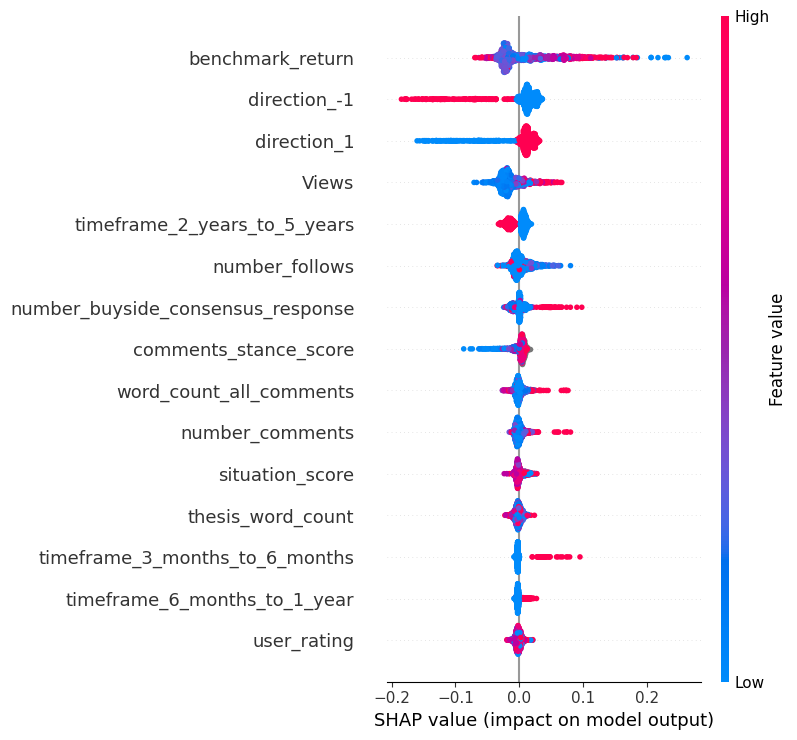

In [ ]:
# Convert to pandas DataFrame (enforce float data type)
X_dense = X_transformed.toarray() if hasattr(X_transformed, "toarray") else X_transformed
X_df = pd.DataFrame(X_dense.astype(np.float32), columns=all_features)

explainer = shap.TreeExplainer(model.named_steps["regressor"])
shap_values = explainer.shap_values(X_df)
shap.summary_plot(shap_values, X_df, max_display=15)

# Portfolio Selection

## On Whole Test Set

In [ ]:
X_test_copy = X_test.copy()
X_test_copy['pred_return'] = y_pred
X_test_copy['excess_return_transformed'] = y_test.values

X_test_copy.columns

Index(['thesis_word_count', 'Views', 'number_comments',
       'word_count_all_comments', 'number_updates', 'word_count_all_updates',
       'user_rating', 'number_likes', 'number_follows',
       'number_buyside_consensus_response', 'thesis_stance_score',
       'thesis_confidence_score', 'comments_stance_score',
       'comments_confidence_score', 'situation_score',
       'situation_updates_score', 'benchmark_return', 'timeframe', 'direction',
       'pred_return', 'excess_return_transformed'],
      dtype='object')

In [ ]:
top_k = 20
portfolio = X_test_copy.nlargest(top_k, 'pred_return')

In [ ]:
def inverse_transform(x):
    return np.sign(x) * (np.expm1(abs(x)))

portfolio['excess_return'] = portfolio['excess_return_transformed'].apply(inverse_transform)

portfolio["benchmark_return_transformed"] = np.sign(portfolio["benchmark_return"]) * np.log1p(abs(portfolio["benchmark_return"]))
portfolio['annualized_return_transformed'] = portfolio['excess_return_transformed']+portfolio['benchmark_return_transformed']

portfolio_sorted = portfolio.sort_values(by='excess_return', ascending=False)

portfolio_sorted[['pred_return','benchmark_return','benchmark_return_transformed','excess_return','excess_return_transformed','annualized_return_transformed']]

,pred_return,benchmark_return,benchmark_return_transformed,excess_return,excess_return_transformed,annualized_return_transformed
5828,0.328914,0.333722,0.287973,42.307374,3.768323,4.056296
6048,0.295699,0.596742,0.467965,8.680054,2.270067,2.738033
5985,0.293618,1.142226,0.761846,5.604042,1.887682,2.649528
5927,0.280020,0.821378,0.599593,3.729018,1.553717,2.153311
6221,0.310059,0.627192,0.486856,2.306755,1.195967,1.682823
6562,0.323739,-0.298892,-0.261512,1.799929,1.029594,0.768082
5911,0.270611,0.776238,0.574498,0.995176,0.690732,1.265230
5892,0.317817,0.840464,0.610018,0.912348,0.648332,1.258350
5986,0.260089,0.554718,0.441294,0.886511,0.634729,1.076023
6324,0.267330,0.255129,0.227239,0.849223,0.614766,0.842004


In [ ]:
bottom = X_test_copy.nsmallest(top_k, 'pred_return')['excess_return_transformed']
random = X_test_copy.sample(top_k)['excess_return_transformed']

print(f"Bottom 20 mean return: {bottom.mean():.2%}")
print(f"Random 20 mean return: {random.mean():.2%}")

Bottom 20 mean return: -50.40%
Random 20 mean return: -5.52%


In [ ]:
# Delete outliers
portfolio_trimmed = portfolio.iloc[4:-4]

In [ ]:
mean_excess_return_trimmed = portfolio_trimmed['excess_return_transformed'].mean()
mean_benchmark_return_trimmed = portfolio_trimmed['benchmark_return_transformed'].mean()

print(f"portfolio mean return: {mean_excess_return_trimmed:.2%}")
print(f"benchmark mean return: {mean_benchmark_return_trimmed:.2%}")
print(f"portfolio Alpha = {mean_excess_return_trimmed - mean_benchmark_return_trimmed:.2%}")

portfolio mean return: 71.53%
benchmark mean return: 36.50%
portfolio Alpha = 35.03%


In [ ]:
returns = portfolio_trimmed['annualized_return_transformed']
rf = 0.02
downside_std = returns[returns < 0].std()
sharpe_ratio = (returns.mean()) / returns.std()
sortino_ratio = (returns.mean()- rf) / downside_std

print(f"return_mean = {returns.mean():.2f}")
print(f"downside_std = {downside_std:.2f}")
print(f"return_std = {returns.std():.2f}")
print(f"Sharpe Ratio = {sharpe_ratio:.2f}")
print(f"Sortino Ratio = {sortino_ratio:.2f}")

return_mean = 1.08
downside_std = 0.14
return_std = 1.07
Sharpe Ratio = 1.01
Sortino Ratio = 7.44


In [ ]:
tracking_error = (portfolio_trimmed['excess_return_transformed']).std()
alpha = portfolio_trimmed['excess_return_transformed'].mean()
information_ratio = alpha / tracking_error

print(f"Information Ratio: {information_ratio:.2f}")

Information Ratio: 0.78


The model demonstrates strong predictive capability when evaluated on the full test set. The Top-20 portfolio, constructed based on predicted returns, achieves a substantial mean excess return and outperforms the benchmark by a wide margin. Notably, the strategy maintains robustness after trimming extreme values, indicating that performance is not driven by outliers.

Risk-adjusted evaluation highlights the model’s strength in delivering stable returns: the portfolio yields a Sharpe Ratio above 1, while the Sortino Ratio exceeds 7, reflecting a highly favorable return profile with limited downside volatility. The Information Ratio further supports the presence of consistent alpha.

These results collectively suggest that the model captures meaningful signal in idea selection and holds promise for practical application in a systematic investment context.

## On Rolling Window Basis

In [ ]:
start_dates = pd.date_range(df_test['created'].min(), df_test['created'].max(), freq='90D')
X_test_rolling = X_test.copy()
X_test_rolling['pred_return'] = y_pred
X_test_rolling['excess_return_transformed'] = y_test.values
X_test_rolling["benchmark_return_transformed"] = np.sign(X_test_rolling["benchmark_return"]) * np.log1p(abs(X_test_rolling["benchmark_return"]))
X_test_rolling['created'] = df_test['created']

start_dates

DatetimeIndex(['2019-04-21 05:50:10', '2019-07-20 05:50:10',
               '2019-10-18 05:50:10', '2020-01-16 05:50:10',
               '2020-04-15 05:50:10', '2020-07-14 05:50:10',
               '2020-10-12 05:50:10', '2021-01-10 05:50:10',
               '2021-04-10 05:50:10', '2021-07-09 05:50:10',
               '2021-10-07 05:50:10', '2022-01-05 05:50:10',
               '2022-04-05 05:50:10', '2022-07-04 05:50:10',
               '2022-10-02 05:50:10'],
              dtype='datetime64[ns]', freq='90D')

In [ ]:
results = []

for start in start_dates:
    end = start + timedelta(days=180)  # holding period = half a year
    window_df = X_test_rolling[(df_test['created'] >= start) & (X_test_rolling['created'] < end)].copy()
    n_ideas= len(window_df)

    if len(window_df) < 30:
        continue

    top_k = 10
    top_df = window_df.nlargest(top_k, 'pred_return')

    mean_return = top_df['excess_return_transformed'].mean()
    benchmark = top_df['benchmark_return_transformed'].mean()
    alpha = mean_return

    results.append({'start': start, 'mean_return': mean_return, 'benchmark': benchmark, 'alpha': alpha, 'n_ideas':n_ideas})

# transfer to DataFrame
df_roll = pd.DataFrame(results)

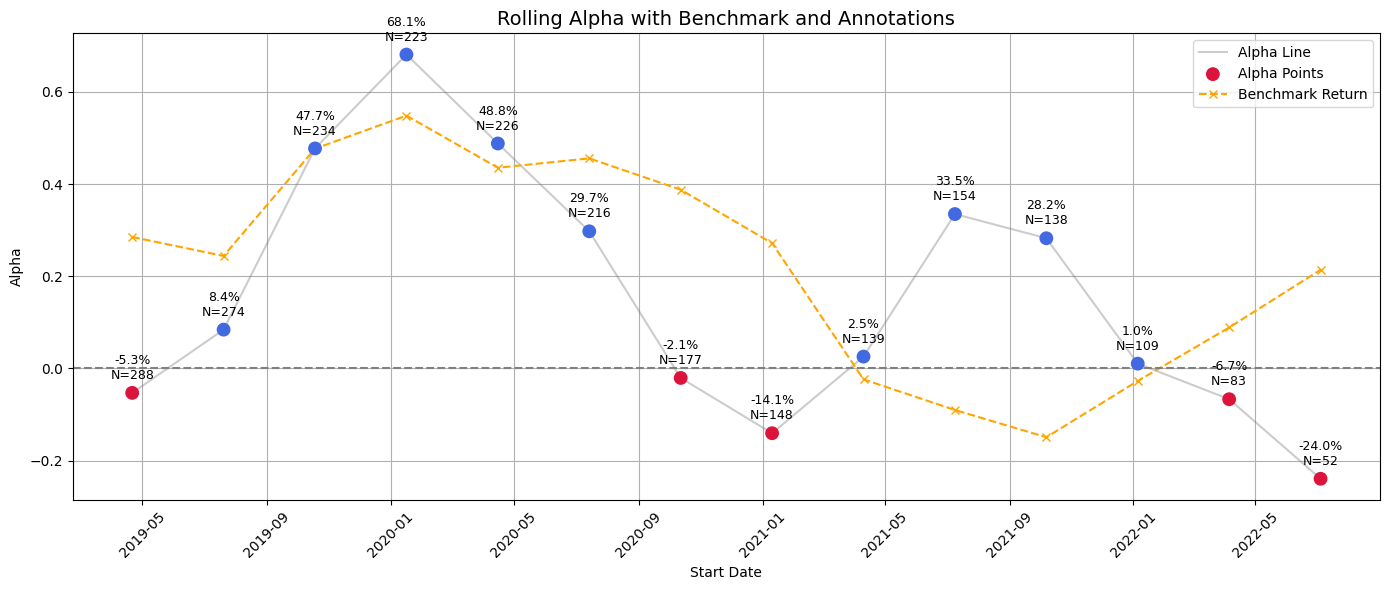

In [ ]:
# Color scheme: positive alpha → blue, negative alpha → red
colors = ['royalblue' if x >= 0 else 'crimson' for x in df_roll['alpha']]

plt.figure(figsize=(14, 6))

# Plot Rolling Alpha (line and points)
plt.plot(df_roll['start'], df_roll['alpha'], linestyle='-', color='gray', alpha=0.4, label='Alpha Line')
plt.scatter(df_roll['start'], df_roll['alpha'], c=colors, s=80, label='Alpha Points', zorder=3)

# Plot Benchmark Line
plt.plot(df_roll['start'], df_roll['benchmark'], linestyle='--', color='orange', marker='x', label='Benchmark Return')

# Add annotations (alpha and number of ideas: N)
for i, row in df_roll.iterrows():
    label = f"{row['alpha']:.1%}\nN={row['n_ideas']}"
    plt.annotate(label,
                 (row['start'], row['alpha']),
                 textcoords="offset points",
                 xytext=(0, 10),
                 ha='center',
                 fontsize=9,
                 color='black')

plt.axhline(0, color='gray', linestyle='--')
plt.title("Rolling Alpha with Benchmark and Annotations", fontsize=14)
plt.xlabel("Start Date")
plt.ylabel("Alpha")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


The rolling window analysis reveals that the model exhibits strong alpha-generation capabilities in several consecutive periods, particularly between mid-2019 and mid-2020. The most notable peak occurs around early 2020.

Performance begins to deteriorate in the latter half of 2020, with negative alpha observed in multiple windows. This trend suggests potential signal decay or a structural shift in market conditions that the static model, trained on earlier data, fails to capture. Interestingly, partial recovery is seen around mid-2021, but the strategy underperforms again in late 2021 through mid-2022, maybe due to the decreasing sample size.

Throughout the test period, the number of ideas (N) per window gradually declines, which may contribute to increased volatility in alpha estimates toward the end. Despite the late-stage weakness, the overall trajectory suggests that the model holds predictive power in earlier periods and could benefit from periodic retraining or adaptation to evolving market regimes.

Future work may consider implementing a walk-forward retraining framework to preserve predictive relevance across changing market conditions.